In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from model.cnn import CNN

model = CNN()
model.load_state_dict(torch.load("model.pt"))

check_gpu = torch.cuda.is_available()
device = torch.device("cpu")

if check_gpu:
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")

model.to(device)

print(f"Using {device}")
print(f"Using {torch.get_num_threads()} threads")


Using mps
Using 4 threads


In [10]:
test_transforms = transforms.Compose(
    [
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)


In [11]:
num_workers = 0
batch_size = 64

test_dataset = datasets.CIFAR10(
    root="./cifar", train=False, download=True, transform=test_transforms
)


In [12]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_workers)


In [13]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval()

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        
        c = (predicted == target).squeeze()
        for i in range(len(target)):
            label = target[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

class_accuracies = []
for i in range(10):
    accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
    class_accuracies.append(accuracy)
    print(f'Accuracy of {classes[i]:10s} : {accuracy:.2f} %')

overall_accuracy = 100 * sum(class_correct) / sum(class_total)
print(f'\nOverall Test Accuracy: {overall_accuracy:.2f}%')


Accuracy of airplane   : 84.60 %
Accuracy of automobile : 93.20 %
Accuracy of bird       : 76.90 %
Accuracy of cat        : 69.70 %
Accuracy of deer       : 77.20 %
Accuracy of dog        : 64.00 %
Accuracy of frog       : 89.30 %
Accuracy of horse      : 82.10 %
Accuracy of ship       : 89.60 %
Accuracy of truck      : 87.90 %

Overall Test Accuracy: 81.45%


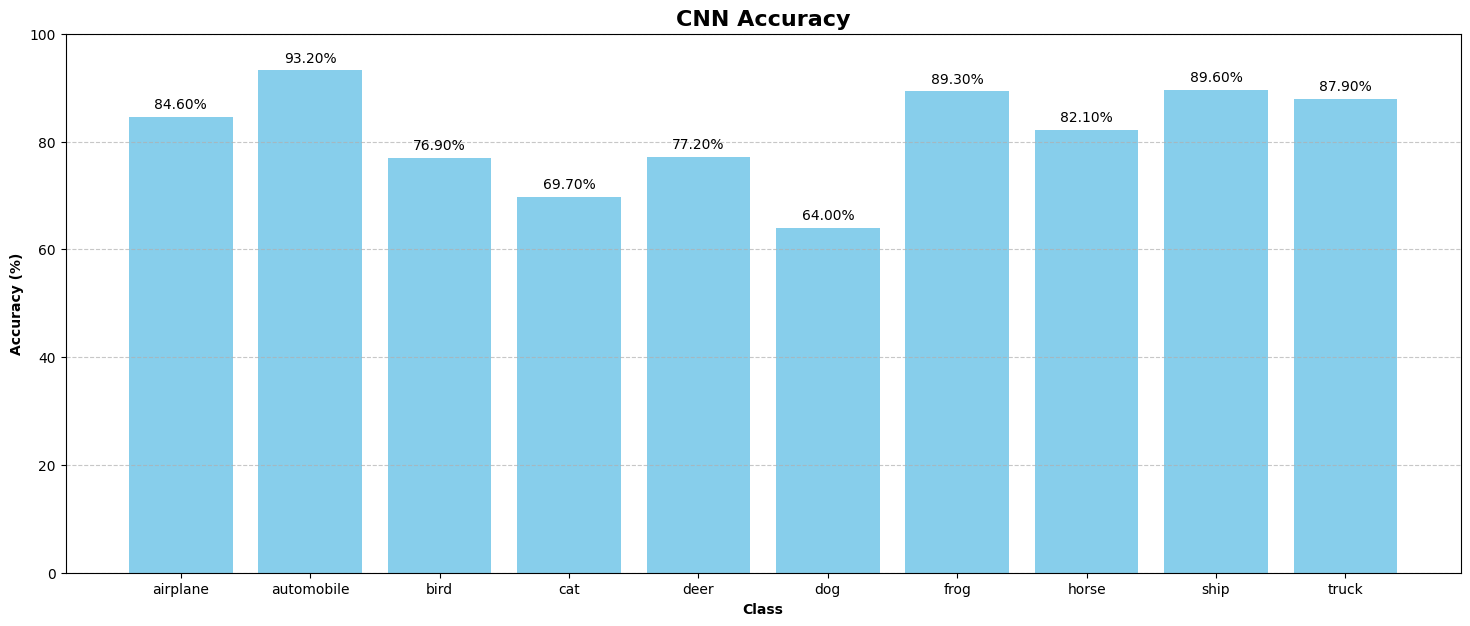

In [33]:
import numpy as np

plt.figure(figsize=(18, 7))
bars = plt.bar(np.arange(len(classes)), class_accuracies, color='skyblue')
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('CNN Accuracy', fontweight='bold', fontsize=16)
plt.xticks(np.arange(len(classes)), classes, ha='center')
plt.ylim([0, 100])
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')


plt.show()
